In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
store = pd.read_csv('stores.csv')

In [4]:
train[(train['Store'] == 1) & (train['Dept'] == 1)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [5]:
train['Date'] = pd.to_datetime(train['Date'])

In [6]:
train['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
5        2010-03-12
6        2010-03-19
7        2010-03-26
8        2010-04-02
9        2010-04-09
10       2010-04-16
11       2010-04-23
12       2010-04-30
13       2010-05-07
14       2010-05-14
15       2010-05-21
16       2010-05-28
17       2010-06-04
18       2010-06-11
19       2010-06-18
20       2010-06-25
21       2010-07-02
22       2010-07-09
23       2010-07-16
24       2010-07-23
25       2010-07-30
26       2010-08-06
27       2010-08-13
28       2010-08-20
29       2010-08-27
            ...    
421540   2012-04-06
421541   2012-04-13
421542   2012-04-20
421543   2012-04-27
421544   2012-05-04
421545   2012-05-11
421546   2012-05-18
421547   2012-05-25
421548   2012-06-01
421549   2012-06-08
421550   2012-06-15
421551   2012-06-22
421552   2012-06-29
421553   2012-07-06
421554   2012-07-13
421555   2012-07-20
421556   2012-07-27
421557   2012-08-03
421558   2012-08-10


In [7]:
store1_dept1_sales = train[(train['Store'] == 1) & (train['Dept'] == 1)][['Date','Weekly_Sales']]
store1_dept1_sales.columns = ['ds', 'y']

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mingyan/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


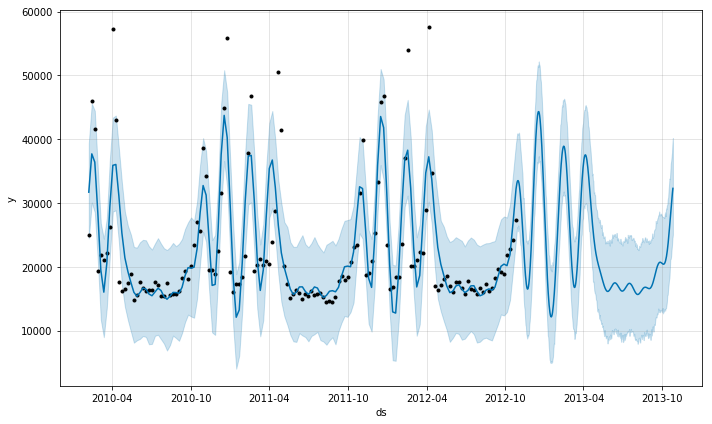

In [8]:
model = Prophet()
model.fit(store1_dept1_sales)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
figure = model.plot(forecast)

Make a holiday dataframe to be passed into the model

In [70]:
train_store1_dep1_holiday = train[(train['Store'] == 1) & (train['Dept'] == 1) & (train['IsHoliday'] ==True)][['Date', 'IsHoliday']]

In [71]:
test = pd.read_csv('test.csv')

In [72]:
test_store1_dep1_holiday = test[(test['Store'] == 1) & (test['Dept'] == 1) & (test['IsHoliday'] == True)][['Date', 'IsHoliday']]

In [73]:
test_store1_dep1_holiday

,Date,IsHoliday
3,2012-11-23,True
8,2012-12-28,True
14,2013-02-08,True


In [74]:
combined_holiday = pd.concat([train_store1_dep1_holiday, test_store1_dep1_holiday])

In [75]:
combined_holiday['Date'] = pd.to_datetime(combined_holiday['Date'])

In [76]:
combined_holiday.columns = ['ds', 'holiday']
combined_holiday['holiday'] = combined_holiday['holiday'].map({True: 'Yes', False: 'No'})

In [80]:
combined_holiday

,ds,holiday
1,2010-02-12,Yes
31,2010-09-10,Yes
42,2010-11-26,Yes
47,2010-12-31,Yes
53,2011-02-11,Yes
83,2011-09-09,Yes
94,2011-11-25,Yes
99,2011-12-30,Yes
105,2012-02-10,Yes
135,2012-09-07,Yes


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mingyan/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


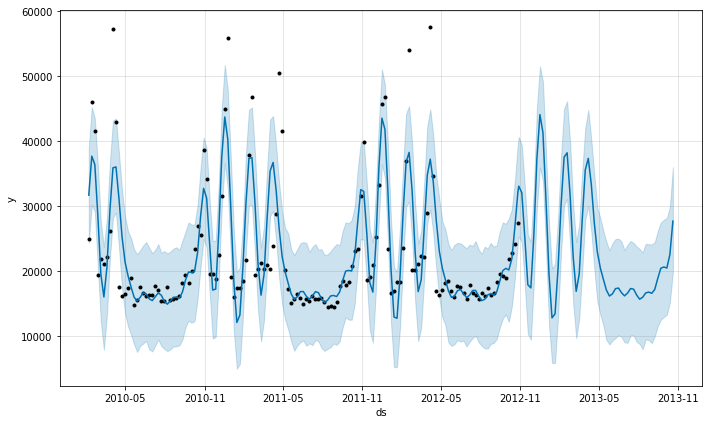

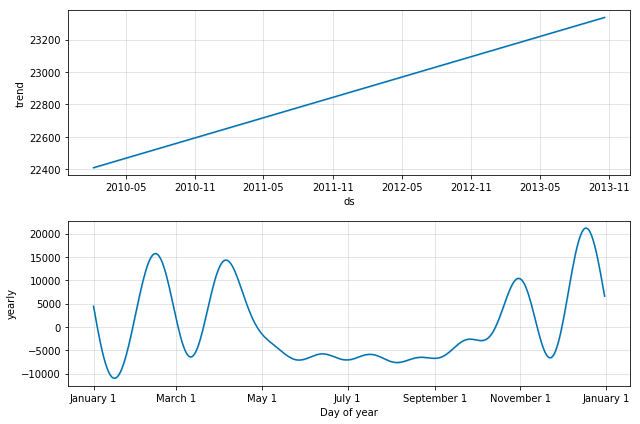

In [81]:
model = Prophet()
model.fit(store1_dept1_sales)
future = model.make_future_dataframe(periods = 52, freq='W')
forecast = model.predict(future)
figure = model.plot(forecast)
figure2 = model.plot_components(forecast)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mingyan/anaconda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


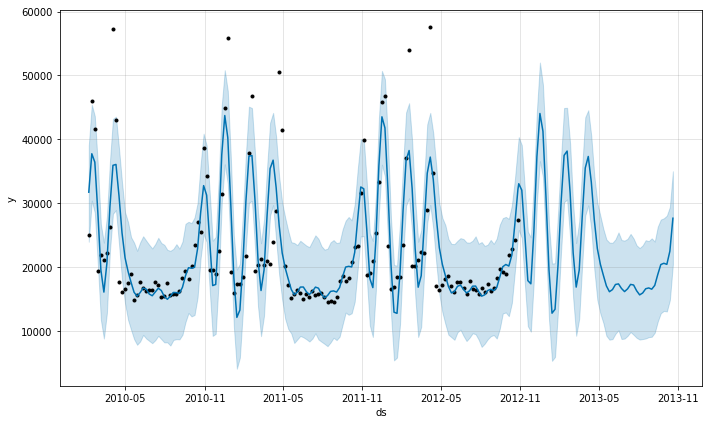

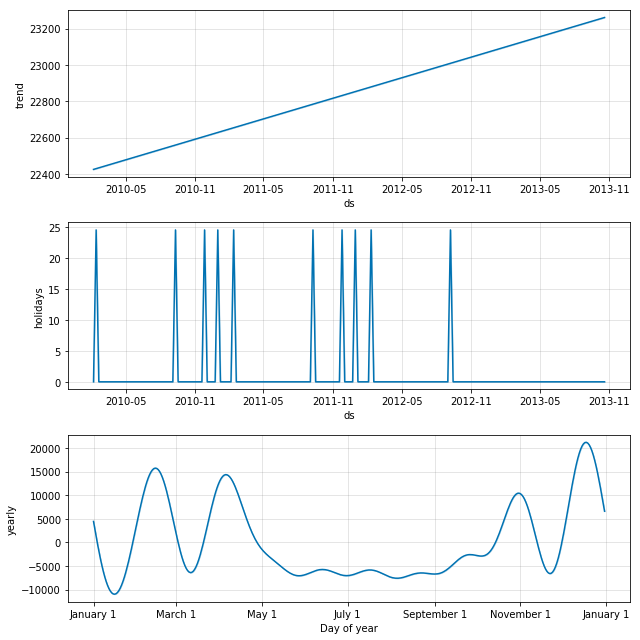

In [78]:
model = Prophet(holidays=combined_holiday)
model.fit(store1_dept1_sales)
future = model.make_future_dataframe(periods = 52, freq='W')
forecast_holiday = model.predict(future)
figure = model.plot(forecast_holiday)
figure2 = model.plot_components(forecast_holiday)

In [84]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
190,2013-09-22,20443.488962,12518.858795,27468.180441
191,2013-09-29,20641.660038,12938.020617,27909.093330
192,2013-10-06,20477.833384,13299.782936,28176.877186
193,2013-10-13,22547.212544,15202.682886,29934.752752
194,2013-10-20,27710.351046,19897.129162,35997.097132


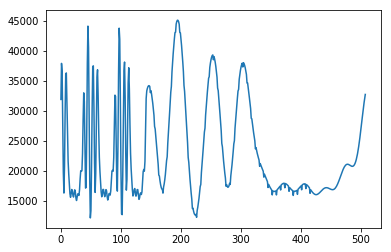